In [1040]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1041]:
#Cargar archivo csv desde seaborn
df=pd.read_csv('projectos_forvia.csv')
df.head(5)

,Number,Active,Project Name,Project Type,Geographical scope,Project manager,State,Percent complete,Project size,Project organization,...,Closed,Domain,Domain Path,Last WAR,Project Health,Project type,Recurrent activity,Planned start date,Actual start date,On-hold
0,PRJ0075198,VERDADERO,TCO - FIS - ABRERA - VW210 IP,Shopfloor JIT/TCO,ABRERA FIS,BENAVENT Pablo,Work in progress,26.47,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075304,Green,Regular,FALSO,1/2/2025 17:01,NaN,FALSO
1,PRJ0073962,VERDADERO,TCO - FCM - ALLENJOIE FHS - GEN2 New automated...,Shopfloor JIT/TCO,ALLENJOIE FCM,MAUVAIS Julien,Work in progress,52.17,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075248,Yellow,Regular,FALSO,18/01/2024 08:00:00,18/01/2024 08:00:00,VERDADERO
2,PRJ0074556,VERDADERO,TCO - FCM - ALLENJOIE FHS - Tank XL,Shopfloor JIT/TCO,ALLENJOIE FHS,THIERY Jean-Francois,Work in progress,95.85,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075265,Yellow,Regular,FALSO,12/8/2024 8:00,12/8/2024 8:00,FALSO
3,PRJ0075087,VERDADERO,TCO - FCM - ALLENJOIE FHS - STELLANTIS - XL694...,Shopfloor JIT/TCO,ALLENJOIE FHS,MAUVAIS Julien,Work in progress,20.90,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075325,Green,Regular,FALSO,8/1/2025 8:00,15/01/2025 09:52:03,VERDADERO
4,PRJ0075456,VERDADERO,TCO – FCM - ALMUSSAFES - FORD - C482 Welding l...,Shopfloor JIT/TCO,ALMUSSAFES FCM,BENAVENT Pablo,Work in progress,24.30,MEDIUM,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075307,Green,Regular,FALSO,12/5/2025 8:00,12/5/2025 8:00,FALSO


In [1042]:
df = df.drop(['Actual end date', 'Closed', 'Project target phase', 'Actual Go Live date'],axis=1)

valores_nulos = df.isnull().sum()
valores_nulos

Number                   1
Active                   1
Project Name             1
Project Type             1
Geographical scope       1
Project manager          1
State                    1
Percent complete         1
Project size             1
Project organization     1
Planned Go Live date     1
BG                       1
Domain                   1
Domain Path              1
Last WAR                14
Project Health          14
Project type             1
Recurrent activity       1
Planned start date       0
Actual start date       19
On-hold                  1
dtype: int64

In [1043]:
df["Number"] =df["Number"].fillna("No description available")
df["Active"] =df["Active"].fillna("No description available")
df["Project Name"] =df["Project Name"].fillna("No Name")
df["Project Type"] =df["Project Type"].fillna("No description available")
df["Geographical scope"] =df["Geographical scope"].fillna("No description available")
df["Project manager"] =df["Project manager"].fillna("No description available")
df["State"] =df["State"].fillna("Not available")
df["Project size"] =df["Project size"].fillna("Not available")
df["Project organization"] =df["Project organization"].fillna("Not available")
df["Planned Go Live date"] =df["Planned Go Live date"].fillna("Not available")
df["BG"] =df["BG"].fillna("Not available")
df["Domain"] =df["Domain"].fillna("No description available")
df["Domain Path"] =df["Domain Path"].fillna("/")
df["Last WAR"] =df["Last WAR"].fillna("No description available")
df["Project Health"] =df["Project Health"].fillna("No color available")
df["Project type"] =df["Project type"].fillna("Regular")
df["Recurrent activity"] =df["Recurrent activity"].fillna("FALSO")
df["Actual start date"] =df["Actual start date"].fillna("NO DATE REGISTERED")
df["On-hold"] =df["On-hold"].fillna("No description available")
df['Percent complete'] = df['Percent complete'].fillna(0)

In [1044]:
lista_cambio = ['Project Type','Geographical scope','Project manager','State','Project size','Project organization','BG','Project Health','On-hold']

In [1045]:
#Obtengo un análisis univariado de las variables categóricas
n=0
for col in lista_cambio:
    Tabla_freq = df[col].value_counts()
    mapeo = {cat: i+1 for i, cat in enumerate(Tabla_freq.index.unique())}
    # print(mapeo)
    df[col] = df[col].map(mapeo)
    # df[col] = pd.factorize(df[col][0+n])
    # n+=1
    
print (df[lista_cambio])

     Project Type  Geographical scope  Project manager  State  Project size  \
0               1                  63                2      1             3   
1               1                  62               15      1             2   
2               1                  51               20      1             1   
3               1                  51               15      1             3   
4               1                  61                2      1             1   
..            ...                 ...              ...    ...           ...   
241             6                  43              119      1             2   
242             8                 126               27      1             1   
243             8                  42               27      1             1   
244             1                  42              120      1             3   
245            12                 127              121      4             4   

     Project organization  BG  Project Health  On-h

In [1046]:
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

Tabla_numericas = df[lista_cambio]
Tabla_numericas["Percent complete"] = df.loc[:, ["Percent complete"]]
print(Tabla_numericas)
# print(cuantitativas)
# print(cualitativas)
# cuantitativas.head()
# variables_categoricas_num = ['Project Type','State','Percent complete', 'Project size', 'Project organization']

     Project Type  Geographical scope  Project manager  State  Project size  \
0               1                  63                2      1             3   
1               1                  62               15      1             2   
2               1                  51               20      1             1   
3               1                  51               15      1             3   
4               1                  61                2      1             1   
..            ...                 ...              ...    ...           ...   
241             6                  43              119      1             2   
242             8                 126               27      1             1   
243             8                  42               27      1             1   
244             1                  42              120      1             3   
245            12                 127              121      4             4   

     Project organization  BG  Project Health  On-h

C:\Users\manue\AppData\Local\Temp\ipykernel_43156\1251541806.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tabla_numericas["Percent complete"] = df.loc[:, ["Percent complete"]]


                      Project Type  Geographical scope  Project manager  \
Project Type              1.000000            0.058818         0.304068   
Geographical scope        0.058818            1.000000         0.099880   
Project manager           0.304068            0.099880         1.000000   
State                     0.205069            0.032650         0.086108   
Project size              0.024297           -0.009333         0.009447   
Project organization      0.375739            0.064871         0.502209   
BG                        0.386941           -0.055844         0.277785   
Project Health            0.033295            0.017746        -0.078813   
On-hold                   0.072061            0.088189        -0.108203   
Percent complete         -0.035967            0.037350        -0.069807   

                         State  Project size  Project organization        BG  \
Project Type          0.205069      0.024297              0.375739  0.386941   
Geographical s

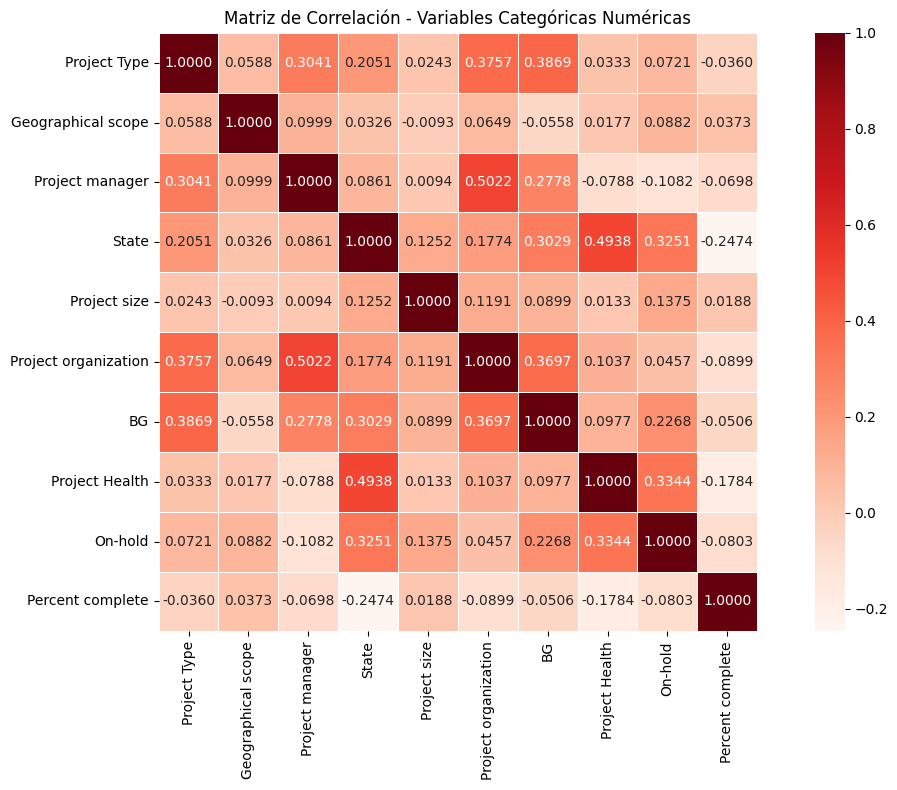

Matriz de correlación:
                      Project Type  Geographical scope  Project manager  \
Project Type                 1.000               0.059            0.304   
Geographical scope           0.059               1.000            0.100   
Project manager              0.304               0.100            1.000   
State                        0.205               0.033            0.086   
Project size                 0.024              -0.009            0.009   
Project organization         0.376               0.065            0.502   
BG                           0.387              -0.056            0.278   
Project Health               0.033               0.018           -0.079   
On-hold                      0.072               0.088           -0.108   
Percent complete            -0.036               0.037           -0.070   

                      State  Project size  Project organization     BG  \
Project Type          0.205         0.024                 0.376  0.387   
Geo

In [1047]:
# Regresión Lineal Simple
# Crea una tabla de los 5 pares de variables con mayor correlación (apoyándote de la herramienta Heatmap).
# Calculamos la correlación de las variables categóricas convertidas a numéricas
correlation_matrix = Tabla_numericas.corr()
print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".4f",
            square=True, linewidths=0.5)
plt.title("Matriz de Correlación - Variables Categóricas Numéricas")
plt.tight_layout()
plt.show()

print("Matriz de correlación:")
print(correlation_matrix.round(3))

In [1048]:
# Obtener los valores de correlación sin incluir la diagonal (correlación = 1)
correlation_values = []
variables = correlation_matrix.columns

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlation_values.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'Correlación': abs(corr_value),
            'Correlación Original': corr_value
        })

# Convertir a DataFrame y ordenar por correlación absoluta
df_correlaciones = pd.DataFrame(correlation_values)
df_correlaciones = df_correlaciones.sort_values('Correlación', ascending=False)

print("Top 5 pares de variables con mayor correlación:")
top_5_correlaciones = df_correlaciones.head(5)
print(top_5_correlaciones.to_string(index=False))

print(f"\n\nLa correlación más alta es {top_5_correlaciones.iloc[0]['Correlación']:.3f} entre:")
print(f"'{top_5_correlaciones.iloc[0]['Variable 1']}' y '{top_5_correlaciones.iloc[0]['Variable 2']}'")

Top 5 pares de variables con mayor correlación:
          Variable 1           Variable 2  Correlación  Correlación Original
     Project manager Project organization     0.502209              0.502209
               State       Project Health     0.493797              0.493797
        Project Type                   BG     0.386941              0.386941
        Project Type Project organization     0.375739              0.375739
Project organization                   BG     0.369726              0.369726


La correlación más alta es 0.502 entre:
'Project manager' y 'Project organization'


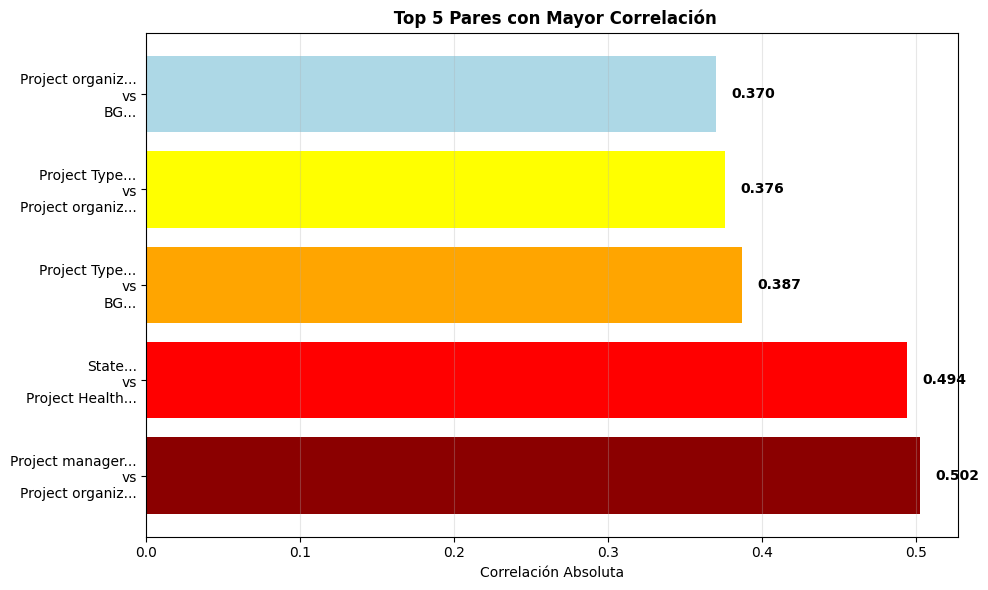

In [1049]:
# Crear visualización específica del top 5
plt.figure(figsize=(10, 6))
plt.barh(range(5), top_5_correlaciones['Correlación'],
        color=['darkred', 'red', 'orange', 'yellow', 'lightblue'])
plt.yticks(range(5), [f"{row['Variable 1'][:15]}...\nvs\n{row['Variable 2'][:15]}..." 
                    for _, row in top_5_correlaciones.iterrows()])
plt.xlabel('Correlación Absoluta')
plt.title(' Top 5 Pares con Mayor Correlación', fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (_, row) in enumerate(top_5_correlaciones.iterrows()):
    plt.text(row['Correlación'] + 0.01, i, f"{row['Correlación']:.3f}", 
            va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()

Project Type

In [1050]:
Vars_Indep= Tabla_numericas[['Geographical scope','Project organization', 'BG']]
Var_Dep= Tabla_numericas['Project Type']

In [1051]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [1052]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [1053]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Geographical scope', 'Project organization', 'BG'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00313539, 0.07119279, 0.28905136]),
 'rank_': 3,
 'singular_': array([582.61976262, 116.97469772,  29.32683404]),
 'intercept_': np.float64(1.1519967062714078)}

In [1054]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.2157647008076926

In [1055]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['Geographical scope','Project organization', 'BG']])
y_pred

array([1.70977042, 1.9956864 , 1.96119711, 1.96119711, 1.99255101,
       2.19358782, 2.70990392, 1.66901035, 1.74020314, 4.26987454,
       2.34667261, 4.06385998, 2.92477533, 1.98628023, 2.02611912,
       2.02611912, 1.84367101, 3.90940675, 2.0552588 , 2.18617223,
       1.81383378, 1.81383378, 1.88502657, 1.88502657, 1.81383378,
       1.81383378, 2.52805131, 2.52805131, 2.52805131, 2.52805131,
       2.52805131, 2.52805131, 2.52805131, 2.52805131, 2.52805131,
       2.79027925, 1.87654158, 1.94773437, 1.94773437, 2.56729471,
       3.21544541, 2.92952944, 2.00173354, 2.71679683, 2.58610705,
       2.15780549, 2.74225181, 3.38298693, 1.75588009, 3.40729969,
       2.25651925, 2.03552529, 1.66273957, 1.73393236, 3.30736571,
       4.53705358, 4.14239555, 2.25238727, 1.68284495, 2.25238727,
       2.25238727, 1.62197951, 1.62197951, 2.61156203, 2.54464944,
       2.09823308, 1.55613632, 1.55613632, 1.55613632, 2.25002483,
       2.24688944, 2.67603677, 2.4029614 , 3.26041027, 2.90758

In [1056]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones', y_pred)
Tabla_numericas.head()

,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='BG', ylabel='Project Type'>

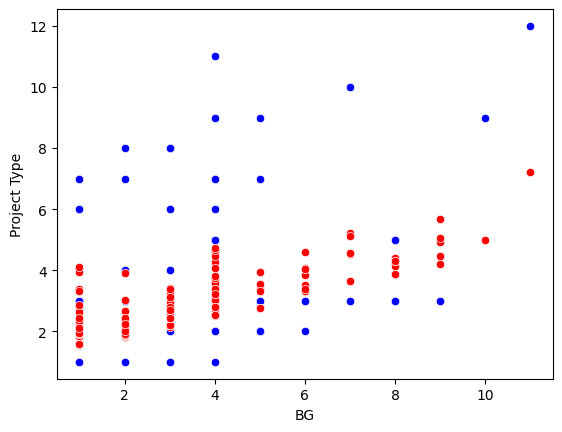

In [1057]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='BG', y='Project Type', color="blue", data=Tabla_numericas)
sns.scatterplot(x='BG', y='Predicciones', color="red", data=Tabla_numericas)

In [1058]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.2157647008076926

In [1059]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.4645047909415926)

Geographical scope

In [1060]:
Vars_Indep= Tabla_numericas[['Project manager','On-hold']]
Var_Dep= Tabla_numericas['Geographical scope']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['Project manager','On-hold']])
y_pred

array([34.63350773, 45.04905074, 36.73437526, 45.04905074, 34.63350773,
       40.23582115, 43.41504266, 38.83524279, 40.35253601, 40.93611032,
       49.95107498, 40.7026806 , 39.06867252, 35.91737122, 36.03408608,
       40.81939546, 39.18538738, 40.46925087, 36.73437526, 40.58596573,
       43.53175752, 34.63350773, 38.71852793, 38.95195765, 44.11533183,
       34.63350773, 43.41504266, 34.51679286, 43.41504266, 34.51679286,
       34.51679286, 34.51679286, 43.41504266, 43.41504266, 43.41504266,
       35.56722663, 36.73437526, 35.3337969 , 35.3337969 , 40.11910628,
       36.6176604 , 40.00239142, 36.50094553, 47.14991827, 38.13495361,
       51.35165333, 39.06867252, 42.5701184 , 37.31794957, 46.91648854,
       35.45051177, 36.03408608, 35.91737122, 36.03408608, 51.11822361,
       36.38423067, 51.23493847, 35.10036718, 43.41504266, 35.10036718,
       35.10036718, 35.80065635, 35.80065635, 35.56722663, 42.68683327,
       38.60181306, 34.75022259, 34.98365231, 34.98365231, 41.86

In [1061]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones1', y_pred)
Tabla_numericas.head()

,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='Project manager', ylabel='Geographical scope'>

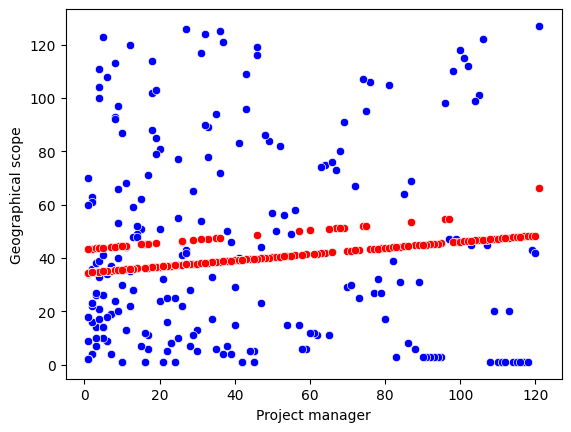

In [1062]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Project manager', y='Geographical scope', color="blue", data=Tabla_numericas)
sns.scatterplot(x='Project manager', y='Predicciones1', color="red", data=Tabla_numericas)

In [1063]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(f'Determinacion: {coef_Deter}')
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print(f"Correlacion: {coef_Correl}")

Determinacion: 0.01989252441791356
Correlacion: 0.14104086080960213


Project manager

In [1064]:
Vars_Indep= Tabla_numericas[['Project Type','Project organization', 'BG']]
Var_Dep= Tabla_numericas['Project manager']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['Project Type','Project organization', 'BG']])
y_pred

array([ 19.21994357,  20.50805998,  20.50805998,  20.50805998,
        20.50805998,  32.60459634,  29.16594142,  25.16807046,
        23.25212236,  76.23698645,  36.8370577 ,  78.15293456,
        49.32683534,  20.50805998,  24.54023877,  24.54023877,
        23.25212236,  77.75969327,  24.47347791,  35.54894128,
        20.50805998,  20.50805998,  24.54023877,  24.54023877,
        20.50805998,  20.50805998,  29.16594142,  29.16594142,
        29.16594142,  29.16594142,  29.16594142,  29.16594142,
        29.16594142,  29.16594142,  29.16594142,  38.05841325,
        20.50805998,  24.54023877,  24.54023877,  27.94458586,
        49.3935962 ,  48.10547979,  25.36835303,  47.84576021,
        33.89271275,  24.54023877,  63.9077145 ,  80.37023392,
        23.25212236,  56.62983951,  35.67513914,  24.54023877,
        25.16807046,  23.25212236,  70.25640653,  61.6561073 ,
        42.4495255 ,  39.71464178,  25.30159218,  39.71464178,
        39.71464178,  19.21994357,  25.16807046,  38.05

In [1065]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones2', y_pred)
Tabla_numericas.head()

,Predicciones2,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,19.219944,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,20.508060,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,20.508060,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,20.508060,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,20.508060,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='Project organization', ylabel='Project manager'>

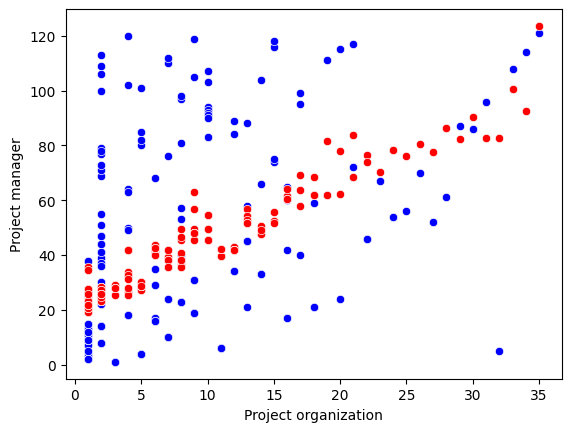

In [1066]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Project organization', y='Project manager', color="blue", data=Tabla_numericas)
sns.scatterplot(x='Project organization', y='Predicciones2', color="red", data=Tabla_numericas)

In [1067]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(f'Determinacion: {coef_Deter}')
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print(f"Correlacion: {coef_Correl}")

Determinacion: 0.27207717373629325
Correlacion: 0.5216101741111778


State

In [1068]:
Vars_Indep= Tabla_numericas[['BG','Project Health', 'On-hold']]
Var_Dep= Tabla_numericas['State']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['BG','Project Health', 'On-hold']])
y_pred

array([0.907357  , 1.27141889, 1.17505125, 1.03922991, 0.94286227,
       0.94286227, 1.34242943, 0.907357  , 0.907357  , 1.01387282,
       1.50360787, 1.2460618 , 1.01387282, 1.17505125, 0.94286227,
       0.94286227, 0.907357  , 1.17505125, 1.17505125, 0.907357  ,
       1.03922991, 0.94286227, 0.94286227, 0.94286227, 1.03922991,
       0.94286227, 1.57461841, 1.01387282, 1.11024045, 1.01387282,
       1.01387282, 1.01387282, 1.11024045, 1.34242943, 1.11024045,
       0.97836754, 1.17505125, 0.94286227, 0.94286227, 0.97836754,
       1.01387282, 0.97836754, 0.907357  , 1.00372463, 0.97836754,
       1.03922991, 1.13954598, 1.13954598, 0.907357  , 1.14574573,
       0.97836754, 1.17505125, 1.13954598, 0.907357  , 1.23591361,
       1.12038864, 1.48445053, 1.13954598, 1.46810259, 0.907357  ,
       0.907357  , 1.13954598, 0.907357  , 0.97836754, 1.2460618 ,
       0.94286227, 1.13954598, 0.907357  , 0.907357  , 0.94286227,
       0.94286227, 0.907357  , 0.97836754, 0.97836754, 0.97836

In [1069]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones3', y_pred)
Tabla_numericas.head()

,Predicciones3,Predicciones2,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,0.907357,19.219944,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,1.271419,20.508060,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,1.175051,20.508060,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,1.039230,20.508060,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,0.942862,20.508060,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='Project Health', ylabel='State'>

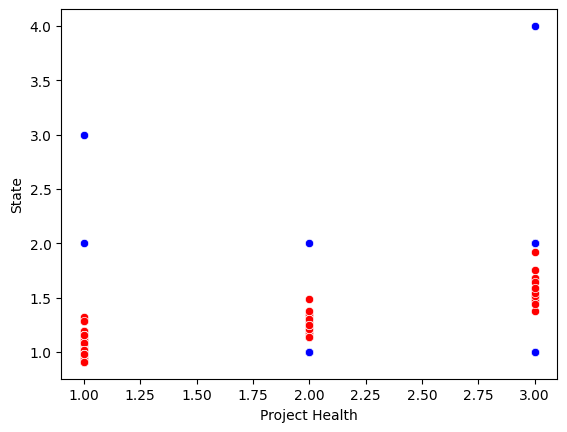

In [1070]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Project Health', y='State', color="blue", data=Tabla_numericas)
sns.scatterplot(x='Project Health', y='Predicciones3', color="red", data=Tabla_numericas)

In [1071]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(f'Determinacion: {coef_Deter}')
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print(f"Correlacion: {coef_Correl}")

Determinacion: 0.3235625478183697
Correlacion: 0.5688255864659831


Project size

In [1072]:
Vars_Indep= Tabla_numericas[['State','Project organization', 'On-hold']]
Var_Dep= Tabla_numericas['Project size']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['State','Project organization', 'On-hold']])
y_pred

array([1.71458395, 1.92687585, 1.71458395, 1.92687585, 1.71458395,
       1.74774469, 1.94898301, 1.71458395, 1.72563753, 1.97986984,
       2.0042509 , 1.96881626, 1.791959  , 1.71458395, 1.72563753,
       1.72563753, 1.72563753, 2.00197699, 1.71458395, 1.791959  ,
       1.92687585, 1.71458395, 1.72563753, 1.72563753, 1.92687585,
       1.71458395, 2.13531169, 1.73669111, 1.94898301, 1.73669111,
       1.73669111, 1.73669111, 1.94898301, 1.94898301, 1.94898301,
       1.78090542, 1.71458395, 1.72563753, 1.72563753, 1.74774469,
       1.80301258, 1.80301258, 1.74774469, 2.07057238, 1.74774469,
       1.93792943, 1.89144121, 1.99092342, 1.72563753, 2.01530448,
       1.71458395, 1.72563753, 1.71458395, 1.72563753, 2.17005458,
       1.88038763, 1.98214375, 1.82511974, 2.13531169, 1.82511974,
       1.82511974, 1.71458395, 1.71458395, 1.78090542, 1.72563753,
       1.72563753, 1.71458395, 1.71458395, 1.71458395, 1.74774469,
       1.74774469, 1.85828047, 1.72563753, 1.85828047, 1.80301

In [1073]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones4', y_pred)
Tabla_numericas.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,1.714584,0.907357,19.219944,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,1.926876,1.271419,20.508060,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,1.714584,1.175051,20.508060,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,1.926876,1.039230,20.508060,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,1.714584,0.942862,20.508060,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='On-hold', ylabel='Project size'>

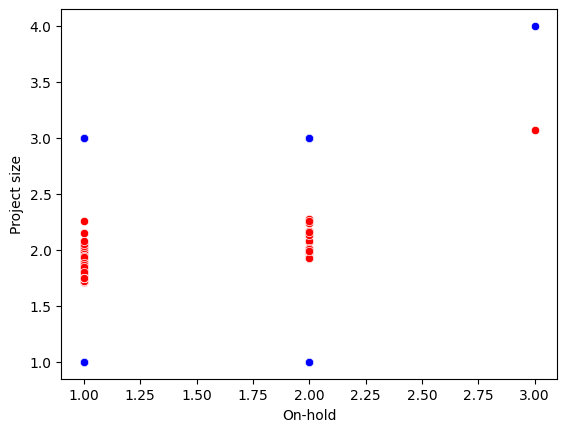

In [1074]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='On-hold', y='Project size', color="blue", data=Tabla_numericas)
sns.scatterplot(x='On-hold', y='Predicciones4', color="red", data=Tabla_numericas)

In [1075]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(f'Determinacion: {coef_Deter}')
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print(f"Correlacion: {coef_Correl}")

Determinacion: 0.03609338478400592
Correlacion: 0.18998259073927254


Project organization

In [1076]:
Vars_Indep= Tabla_numericas[['Project Type','Project manager', 'BG']]
Var_Dep= Tabla_numericas['Project organization']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['Project Type','Project manager', 'BG']])
y_pred

array([ 1.54135552,  3.31584421,  3.73144147,  3.31584421,  2.23529132,
        8.25407347,  4.21639295,  6.56270423,  6.29055818,  9.46431232,
        7.48321069, 10.65077236, 10.83979896,  3.1496053 ,  3.90907423,
        7.31697179,  5.45936365,  7.7439629 ,  5.08414042,  6.45679708,
        2.23529132,  2.23529132,  5.82082164,  5.98706055,  2.65088859,
        2.23529132,  4.21639295,  4.21639295,  4.21639295,  4.21639295,
        4.21639295,  4.21639295,  4.21639295,  4.21639295,  4.21639295,
        4.94688169,  3.73144147,  3.41035751,  3.41035751,  6.8358414 ,
        8.41794098, 10.13446931,  2.87126676,  4.79440803,  7.45185912,
        8.48064413,  8.75799156, 10.57522567,  4.1294524 , 12.13835864,
        8.2455096 ,  3.90907423,  4.48471792,  3.21513842,  8.97316836,
        8.30446107, 13.23748896,  1.87383333,  2.13458554,  1.87383333,
        1.87383333,  2.37255005,  4.40159846,  4.94688169, 10.03475464,
        5.73770219,  3.65352339,  1.79071388,  1.79071388,  9.41

In [1077]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones5', y_pred)
Tabla_numericas.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,1.541356,1.714584,0.907357,19.219944,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,3.315844,1.926876,1.271419,20.508060,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,3.731441,1.714584,1.175051,20.508060,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,3.315844,1.926876,1.039230,20.508060,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,2.235291,1.714584,0.942862,20.508060,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='Project manager', ylabel='Project organization'>

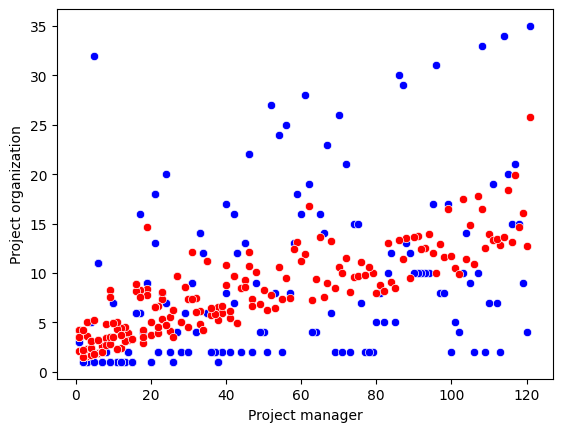

In [1078]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Project manager', y='Project organization', color="blue", data=Tabla_numericas)
sns.scatterplot(x='Project manager', y='Predicciones5', color="red", data=Tabla_numericas)

In [1079]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(f'Determinacion: {coef_Deter}')
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print(f"Correlacion: {coef_Correl}")

Determinacion: 0.33658664640325353
Correlacion: 0.5801608797594453


BG

In [1080]:
Vars_Indep= Tabla_numericas[['Project Type','State', 'Project organization']]
Var_Dep= Tabla_numericas['BG']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['Project Type','State', 'Project organization']])
y_pred

array([ 2.04189835,  2.04189835,  2.04189835,  2.04189835,  2.04189835,
        3.01115308,  2.4297086 ,  2.81697707,  2.36498326,  4.11202554,
        2.75333527,  4.56401935,  4.04513314,  2.04189835,  2.36498326,
        2.36498326,  2.36498326,  4.24147621,  2.5586175 ,  2.75333527,
        2.04189835,  2.04189835,  2.36498326,  2.36498326,  2.04189835,
        2.04189835,  3.79109743,  2.4297086 ,  2.4297086 ,  2.4297086 ,
        2.4297086 ,  2.4297086 ,  2.4297086 ,  2.4297086 ,  2.4297086 ,
        2.94696951,  2.04189835,  2.36498326,  2.36498326,  2.23607436,
        3.8514989 ,  3.8514989 ,  2.23607436,  3.14168728,  3.01115308,
        2.36498326,  4.62766115,  4.95182959,  2.36498326,  4.62657762,
        3.85041537,  2.36498326,  2.81697707,  2.36498326,  4.24093444,
        3.52949752,  2.88224417,  2.6891517 ,  3.79109743,  2.6891517 ,
        2.6891517 ,  2.04189835,  2.81697707,  2.94696951,  2.36498326,
        2.36498326,  2.81697707,  2.04189835,  2.04189835,  3.01

In [1081]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones6', y_pred)
Tabla_numericas.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,2.041898,1.541356,1.714584,0.907357,19.219944,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,2.041898,3.315844,1.926876,1.271419,20.508060,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,2.041898,3.731441,1.714584,1.175051,20.508060,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,2.041898,3.315844,1.926876,1.039230,20.508060,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,2.041898,2.235291,1.714584,0.942862,20.508060,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='Project Type', ylabel='BG'>

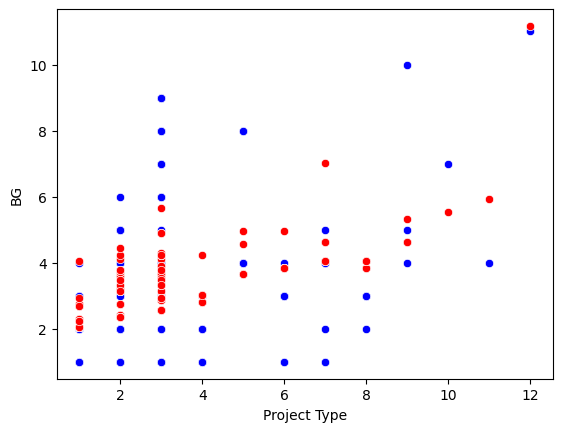

In [1082]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Project Type', y='BG', color="blue", data=Tabla_numericas)
sns.scatterplot(x='Project Type', y='Predicciones6', color="red", data=Tabla_numericas)

Project Health

In [1083]:
Vars_Indep= Tabla_numericas[['State','Project organization', 'On-hold']]
Var_Dep= Tabla_numericas['Project Health']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['State','Project organization', 'On-hold']])
y_pred

array([1.19352444, 1.46048567, 1.19352444, 1.46048567, 1.19352444,
       1.19793896, 1.46342869, 1.19352444, 1.19499594, 1.22884063,
       1.47078623, 1.22736912, 1.20382499, 1.19352444, 1.19499594,
       1.19499594, 1.19499594, 1.23178364, 1.19352444, 1.20382499,
       1.46048567, 1.19352444, 1.19499594, 1.19499594, 1.46048567,
       1.19352444, 2.25050286, 1.19646745, 1.46342869, 1.19646745,
       1.19646745, 1.19646745, 1.46342869, 1.46342869, 1.46342869,
       1.20235348, 1.19352444, 1.19499594, 1.19499594, 1.19793896,
       1.2052965 , 1.2052965 , 1.19793896, 1.47961528, 1.19793896,
       1.46195718, 1.21706856, 1.23031214, 1.19499594, 1.47225774,
       1.19352444, 1.19499594, 1.19352444, 1.19499594, 1.49285885,
       1.21559706, 1.46784321, 1.20823952, 2.25050286, 1.20823952,
       1.20823952, 1.19352444, 1.19352444, 1.20235348, 1.19499594,
       1.19499594, 1.19352444, 1.19352444, 1.19352444, 1.19793896,
       1.19793896, 1.21265404, 1.19499594, 1.21265404, 1.20529

In [1084]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones7', y_pred)
Tabla_numericas.head()

,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,1.193524,2.041898,1.541356,1.714584,0.907357,19.219944,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,1.460486,2.041898,3.315844,1.926876,1.271419,20.508060,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,1.193524,2.041898,3.731441,1.714584,1.175051,20.508060,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,1.460486,2.041898,3.315844,1.926876,1.039230,20.508060,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,1.193524,2.041898,2.235291,1.714584,0.942862,20.508060,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='State', ylabel='Project Health'>

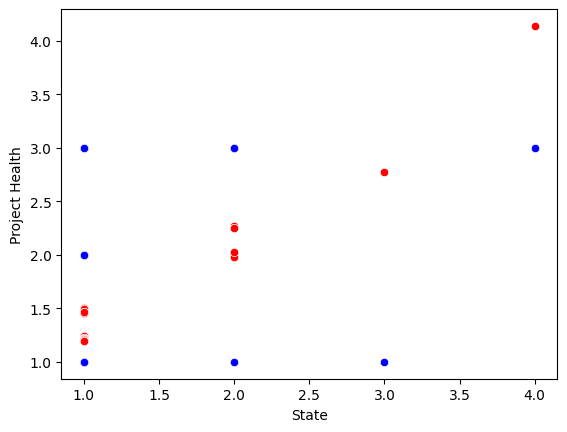

In [1085]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='State', y='Project Health', color="blue", data=Tabla_numericas)
sns.scatterplot(x='State', y='Predicciones7', color="red", data=Tabla_numericas)

In [1086]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(f'Determinacion: {coef_Deter}')
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print(f"Correlacion: {coef_Correl}")

Determinacion: 0.2779827203439038
Correlacion: 0.5272406664360251


On-hold

In [1087]:
Vars_Indep= Tabla_numericas[['State','BG', 'Project Health']]
Var_Dep= Tabla_numericas['On-hold']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['State','BG', 'Project Health']])
y_pred

array([1.07995183, 1.28723935, 1.28723935, 1.11185824, 1.11185824,
       1.11185824, 1.35105219, 1.07995183, 1.07995183, 1.17567108,
       1.46262047, 1.35105219, 1.17567108, 1.28723935, 1.11185824,
       1.11185824, 1.07995183, 1.28723935, 1.28723935, 1.07995183,
       1.11185824, 1.11185824, 1.11185824, 1.11185824, 1.11185824,
       1.11185824, 1.74055392, 1.17567108, 1.17567108, 1.17567108,
       1.17567108, 1.17567108, 1.17567108, 1.35105219, 1.17567108,
       1.14376466, 1.28723935, 1.11185824, 1.11185824, 1.14376466,
       1.17567108, 1.14376466, 1.07995183, 1.07995183, 1.14376466,
       1.11185824, 1.25533294, 1.25533294, 1.07995183, 1.2075775 ,
       1.14376466, 1.28723935, 1.25533294, 1.07995183, 1.25533294,
       1.27139033, 1.47867786, 1.25533294, 1.64483467, 1.07995183,
       1.07995183, 1.25533294, 1.07995183, 1.14376466, 1.35105219,
       1.11185824, 1.25533294, 1.07995183, 1.07995183, 1.11185824,
       1.11185824, 1.07995183, 1.14376466, 1.14376466, 1.14376

In [1088]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones8', y_pred)
Tabla_numericas.head()

,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,1.079952,1.193524,2.041898,1.541356,1.714584,0.907357,19.219944,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,1.287239,1.460486,2.041898,3.315844,1.926876,1.271419,20.508060,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,1.287239,1.193524,2.041898,3.731441,1.714584,1.175051,20.508060,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,1.111858,1.460486,2.041898,3.315844,1.926876,1.039230,20.508060,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,1.111858,1.193524,2.041898,2.235291,1.714584,0.942862,20.508060,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='Project Health', ylabel='On-hold'>

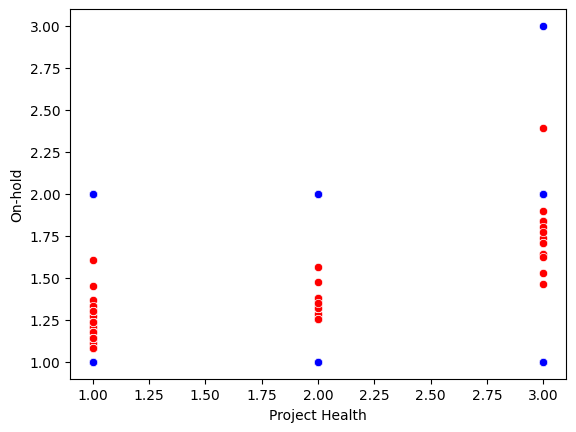

In [1089]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Project Health', y='On-hold', color="blue", data=Tabla_numericas)
sns.scatterplot(x='Project Health', y='Predicciones8', color="red", data=Tabla_numericas)

In [1090]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(f'Determinacion: {coef_Deter}')
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print(f"Correlacion: {coef_Correl}")

Determinacion: 0.16739122407072038
Correlacion: 0.4091347260630908


Percent complete

In [1091]:
Vars_Indep= Tabla_numericas[['State','Project organization', 'Project Health']]
Var_Dep= Tabla_numericas['Percent complete']
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Tabla_numericas[['State','Project organization', 'Project Health']])
y_pred

array([ 43.56597786,  39.05817476,  39.05817476,  43.56597786,
        43.56597786,  42.90689325,  38.61878502,  43.56597786,
        43.34628299,  38.293301  ,  33.01250757,  34.00519276,
        42.02811378,  39.05817476,  43.34628299,  43.34628299,
        43.34628299,  33.34610815,  39.05817476,  42.02811378,
        43.56597786,  43.56597786,  43.34628299,  43.34628299,
        43.56597786,  43.56597786,  11.12089107,  43.12658812,
        43.12658812,  43.12658812,  43.12658812,  43.12658812,
        43.12658812,  38.61878502,  43.12658812,  42.24780865,
        39.05817476,  43.34628299,  43.34628299,  42.90689325,
        41.80841891,  41.80841891,  42.90689325,  40.70994456,
        42.90689325,  43.34628299,  35.54305685,  33.56580302,
        43.34628299,  41.80841891,  43.56597786,  38.83847989,
        39.05817476,  43.34628299,  34.22488763,  40.27055482,
        37.95970041,  36.86122606,  11.12089107,  41.36902917,
        41.36902917,  39.05817476,  43.56597786,  42.24

In [1092]:
#Insertamos la columna de predicciones en el DataFrame
Tabla_numericas.insert(0, 'Predicciones9', y_pred)
Tabla_numericas.head()

,Predicciones9,Predicciones8,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Project Type,Geographical scope,Project manager,State,Project size,Project organization,BG,Project Health,On-hold,Percent complete
0,43.565978,1.079952,1.193524,2.041898,1.541356,1.714584,0.907357,19.219944,34.633508,1.709770,1,63,2,1,3,1,1,1,1,26.47
1,39.058175,1.287239,1.460486,2.041898,3.315844,1.926876,1.271419,20.508060,45.049051,1.995686,1,62,15,1,2,1,2,2,2,52.17
2,39.058175,1.287239,1.193524,2.041898,3.731441,1.714584,1.175051,20.508060,36.734375,1.961197,1,51,20,1,1,1,2,2,1,95.85
3,43.565978,1.111858,1.460486,2.041898,3.315844,1.926876,1.039230,20.508060,45.049051,1.961197,1,51,15,1,3,1,2,1,2,20.90
4,43.565978,1.111858,1.193524,2.041898,2.235291,1.714584,0.942862,20.508060,34.633508,1.992551,1,61,2,1,1,1,2,1,1,24.30


<Axes: xlabel='State', ylabel='Percent complete'>

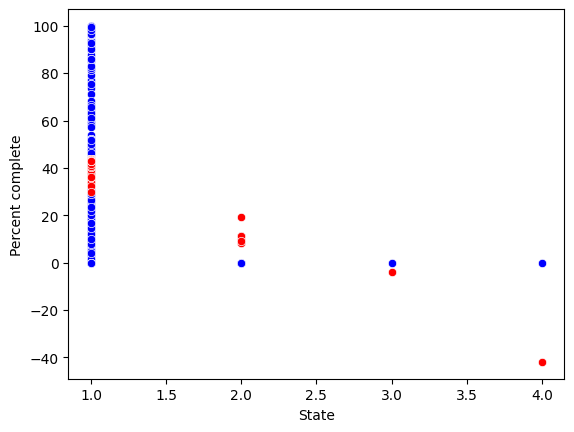

In [1093]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='State', y='Percent complete', color="blue", data=Tabla_numericas)
sns.scatterplot(x='State', y='Predicciones9', color="red", data=Tabla_numericas)

In [1094]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
print(f'Determinacion: {coef_Deter}')
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print(f"Correlacion: {coef_Correl}")

Determinacion: 0.06747737820713351
Correlacion: 0.2597640818264402
